## Physical Activity Risk Prediction & Recommandations

### 1) Data Collection
- Dataset Source - https://drive.google.com/file/d/1jrOQdg4fjLljNFnLxAbMouav4s1WzJxa/view?usp=drive_link

### 1.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from imblearn.over_sampling import SMOTE

#### Import the CSV Data as Pandas DataFrame

In [22]:
physicalActivity_df = pd.read_csv('../../data/PhysicalActivityParameter.csv')

#### Shape of the Dataset

In [23]:
physicalActivity_df.shape

(697, 15)

#### Head of the Dataset

In [24]:
physicalActivity_df.head()

,Id,Age,Gender,Height,Weight,Energy Levels,PhysicalActivity,SittingTime,Cardiovascular Health,Muscle Strength,Flexibility,Balance,Thirsty,Pain or Discomfort,Available Time
0,1,24,Male,167.0,50.0,2,2,Yes,No,No,No,No,2,No,50
1,2,30,Male,164.0,60.0,1,3,Yes,Yes,No,Yes,Yes,3,No,120
2,3,24,Male,165.0,55.0,3,1,Yes,Yes,No,Yes,Yes,1,Yes,120
3,4,28,Female,153.0,48.0,4,2,Yes,No,Yes,Yes,Yes,2,No,300
4,5,24,Female,163.0,56.0,2,3,Yes,Yes,No,Yes,Yes,5,No,120


### 2.2 Dataset information


- gender : sex of students  -> (Male/female)
- Age : -> 30-50
- Height : -> (cm)
- Weight:-> (kg) 
- EnergyLevels ->1-10
- PhysicalActivity ->1-5
- SittingTime -> Yes/No
- Cardiovascular Health -> Yes/No
- Muscle Strength -> Yes/No
- Flexibility -> Yes/No
- Balance -> Yes/No
- Thirsty -> 1-10
- Pain or Discomfort - Yes/No
- Available Time - Time(minutes)


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [25]:
physicalActivity_df.isna().sum()

Id                       0
Age                      0
Gender                   0
Height                   0
Weight                   0
Energy Levels            0
PhysicalActivity         0
SittingTime              3
Cardiovascular Health    0
Muscle Strength          0
Flexibility              0
Balance                  0
Thirsty                  0
Pain or Discomfort       0
Available Time           0
dtype: int64

#### Convert Categorical colums to numerical

In [26]:
binary_columns = ["SittingTime", "Cardiovascular Health", "Muscle Strength",
                  "Flexibility", "Balance", "Pain or Discomfort", ]
for col in binary_columns:
    physicalActivity_df[col] = physicalActivity_df[col].map({"Yes": 1, "No": 0})

physicalActivity_df["Gender"] = physicalActivity_df["Gender"].map({"Male": 1, "Female": 0})

#### Check duplicates

In [27]:
physicalActivity_df.duplicated().sum()

0

### 3.3 Check data types


In [28]:
physicalActivity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     697 non-null    int64  
 1   Age                    697 non-null    int64  
 2   Gender                 697 non-null    int64  
 3   Height                 697 non-null    float64
 4   Weight                 697 non-null    float64
 5   Energy Levels          697 non-null    int64  
 6   PhysicalActivity       697 non-null    int64  
 7   SittingTime            694 non-null    float64
 8   Cardiovascular Health  697 non-null    int64  
 9   Muscle Strength        697 non-null    int64  
 10  Flexibility            697 non-null    int64  
 11  Balance                697 non-null    int64  
 12  Thirsty                697 non-null    int64  
 13  Pain or Discomfort     697 non-null    int64  
 14  Available Time         697 non-null    int64  
dtypes: flo

### 3.4 Checking the number of unique values of each column


In [29]:
physicalActivity_df.nunique()

Id                       697
Age                       31
Gender                     2
Height                    58
Weight                    89
Energy Levels              5
PhysicalActivity           5
SittingTime                2
Cardiovascular Health      2
Muscle Strength            2
Flexibility                2
Balance                    2
Thirsty                    6
Pain or Discomfort         2
Available Time            71
dtype: int64

#### Calculate BMI

In [30]:
physicalActivity_df["BMI"] = physicalActivity_df["Weight"] / (physicalActivity_df["Height"] / 100) ** 2

#### Assign Value Score and fullFill missing values


In [31]:
import pandas as pd
physicalActivity_df.replace('?', pd.NA, inplace=True)

for col in physicalActivity_df:
    if col not in physicalActivity_df.columns:
        physicalActivity_df[col] = pd.NA  

#### Rename Colums Correctly

In [40]:
print(physicalActivity_df.columns.tolist())

['Id', 'Age', 'Gender', 'Height', 'Weight', 'Energy Levels', 'Physical_Activity', 'Sitting_Time', 'Cardiovascular_Health', 'Muscle_Strength', 'Flexibility', 'Balance', 'Thirsty', 'Pain_or_Discomfort', 'Available_Time', 'BMI']


In [41]:
physicalActivity_df.rename(columns={
    'Energy Levels': 'EnergyLevels',
    # ... other renames ...
}, inplace=True)

In [42]:
physicalActivity_df.columns = physicalActivity_df.columns.str.strip()

physicalActivity_df.rename(columns={
    'PhysicalActivity': 'Physical_Activity',
    'SittingTime': 'Sitting_Time',
    'Cardiovascular Health': 'Cardiovascular_Health',
    'Muscle Strength': 'Muscle_Strength',
    'Pain or Discomfort':"Pain_or_Discomfort",
    'Available Time': 'Available_Time',

}, inplace=True)

In [43]:
physicalActivity_df.head()

,Id,Age,Gender,Height,Weight,EnergyLevels,Physical_Activity,Sitting_Time,Cardiovascular_Health,Muscle_Strength,Flexibility,Balance,Thirsty,Pain_or_Discomfort,Available_Time,BMI
0,1,24,1,167.0,50.0,2,2,1.0,0,0,0,0,2,0,50,17.928215
1,2,30,1,164.0,60.0,1,3,1.0,1,0,1,1,3,0,120,22.308150
2,3,24,1,165.0,55.0,3,1,1.0,1,0,1,1,1,1,120,20.202020
3,4,28,0,153.0,48.0,4,2,1.0,0,1,1,1,2,0,300,20.504934
4,5,24,0,163.0,56.0,2,3,1.0,1,0,1,1,5,0,120,21.077195


### Merged with Diabetic Risk value with Physical Activity Dataset

#### Load the diabetic dataset

In [44]:
diabetic_risk_df=pd.read_csv('../../data/preproccedData/PreProccedWithoutAugmented/PreProccedCommonParameters.csv')

In [45]:
diabetic_risk_df.head()

,Age,Gender,Height,Weight,Waist_Circumference,Diet_Food_Habits,Family_History,Blood_Pressure,Cholesterol_Lipid_Levels,Thirst,Fatigue,Urination,Vision Changes,BMI,DiabetesRisk,RiskLevel
0,24.0,1.0,167.0,50.0,30.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.928215,30.774236,1
1,30.0,1.0,164.0,60.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.308150,42.784055,1
2,24.0,1.0,165.0,55.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.202020,32.703477,1
3,28.0,0.0,153.0,48.0,28.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.504934,28.756909,0
4,24.0,0.0,163.0,56.0,31.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.077195,37.049640,1


In [46]:
nutrition_df = physicalActivity_df.reset_index(drop=True)
selected_columns = diabetic_risk_df[['DiabetesRisk',]].reset_index(drop=True)

# Now merge
merged_df = pd.concat([physicalActivity_df, selected_columns], axis=1)

# Check the result
print("Merged shape:", merged_df.shape) 

Merged shape: (697, 17)


In [47]:
merged_df.head()

,Id,Age,Gender,Height,Weight,EnergyLevels,Physical_Activity,Sitting_Time,Cardiovascular_Health,Muscle_Strength,Flexibility,Balance,Thirsty,Pain_or_Discomfort,Available_Time,BMI,DiabetesRisk
0,1,24,1,167.0,50.0,2,2,1.0,0,0,0,0,2,0,50,17.928215,30.774236
1,2,30,1,164.0,60.0,1,3,1.0,1,0,1,1,3,0,120,22.308150,42.784055
2,3,24,1,165.0,55.0,3,1,1.0,1,0,1,1,1,1,120,20.202020,32.703477
3,4,28,0,153.0,48.0,4,2,1.0,0,1,1,1,2,0,300,20.504934,28.756909
4,5,24,0,163.0,56.0,2,3,1.0,1,0,1,1,5,0,120,21.077195,37.049640


In [51]:
import pandas as pd

# Define the function to calculate PhysicalActivityRisk
def calculate_physical_activity_risk(row):
    # Low physical activity increases risk
    physical_activity_risk = 1 if row['Physical_Activity'] <= 2 else 0

    # High sitting time increases risk
    sitting_risk = 1 if row['Sitting_Time'] >= 120 else 0

    # Low energy levels increase risk
    energy_risk = 1 if row['EnergyLevels'] <= 2 else 0

    # Muscle strength risk: 0 = poor, 1 = good
    muscle_risk = 1 if row['Muscle_Strength'] == 0 else 0

    # Flexibility and Balance are indicators of physical function
    flexibility_risk = 1 if row['Flexibility'] == 0 else 0
    balance_risk = 1 if row['Balance'] == 0 else 0

    # Combine all into a total physical activity risk score
    total_risk = (physical_activity_risk +
                  sitting_risk +
                  energy_risk +
                  muscle_risk +
                  flexibility_risk +
                  balance_risk)

    # If the diabetes risk is high (>30), increase physical activity risk
    if row['DiabetesRisk'] > 30:
        total_risk += 1

    return total_risk

# Apply the function to the DataFrame
merged_df['PhysicalActivityRisk'] = merged_df.apply(calculate_physical_activity_risk, axis=1)

# Normalize the score to a scale of 0–100
merged_df['PhysicalActivityRisk'] = (merged_df['PhysicalActivityRisk'] / 7) * 100  # Max score is 7

# View the result
print(merged_df[['Age', 'Physical_Activity', 'Sitting_Time', 'EnergyLevels', 'Muscle_Strength',
          'Flexibility', 'Balance', 'DiabetesRisk', 'PhysicalActivityRisk']].head())


   Age  Physical_Activity  Sitting_Time  EnergyLevels  Muscle_Strength  \
0   24                  2           1.0             2                0   
1   30                  3           1.0             1                0   
2   24                  1           1.0             3                0   
3   28                  2           1.0             4                1   
4   24                  3           1.0             2                0   

   Flexibility  Balance  DiabetesRisk  PhysicalActivityRisk  
0            0        0     30.774236             85.714286  
1            1        1     42.784055             42.857143  
2            1        1     32.703477             42.857143  
3            1        1     28.756909             14.285714  
4            1        1     37.049640             42.857143  


In [52]:
merged_df.head()

,Id,Age,Gender,Height,Weight,EnergyLevels,Physical_Activity,Sitting_Time,Cardiovascular_Health,Muscle_Strength,Flexibility,Balance,Thirsty,Pain_or_Discomfort,Available_Time,BMI,DiabetesRisk,PhysicalActivityRisk
0,1,24,1,167.0,50.0,2,2,1.0,0,0,0,0,2,0,50,17.928215,30.774236,85.714286
1,2,30,1,164.0,60.0,1,3,1.0,1,0,1,1,3,0,120,22.308150,42.784055,42.857143
2,3,24,1,165.0,55.0,3,1,1.0,1,0,1,1,1,1,120,20.202020,32.703477,42.857143
3,4,28,0,153.0,48.0,4,2,1.0,0,1,1,1,2,0,300,20.504934,28.756909,14.285714
4,5,24,0,163.0,56.0,2,3,1.0,1,0,1,1,5,0,120,21.077195,37.049640,42.857143


#### Augmented the data for better accuracy

In [53]:
import pandas as pd
import numpy as np

# Drop missing values if any
merged_df = merged_df.dropna()

# Ensure valid types
merged_df['Age'] = merged_df['Age'].round().astype(int).clip(lower=0)
merged_df['BMI'] = merged_df['BMI'].clip(lower=0)
merged_df['DiabetesRisk'] = merged_df['DiabetesRisk'].clip(0, 100)

# Ensure Gender and RiskLevel are binary/integer and clipped
merged_df['Gender'] = merged_df['Gender'].round().clip(0, 1).astype(int)

# --- Augmentation Functions ---

# Add noise, excluding protected fields
def add_noise(df, noise_factor=0.01):
    df_noisy = df.copy()
    for column in df_noisy.select_dtypes(include=[np.number]).columns:
        if column in ['Age', 'DiabetesRisk', 'Gender', ]:
            continue
        noise = noise_factor * np.random.normal(size=df_noisy[column].shape)
        df_noisy[column] += noise
        df_noisy[column] = df_noisy[column].clip(lower=0)
    return df_noisy

# Apply random scaling, excluding protected fields
def apply_random_scaling(df, scale_factor_range=(0.9, 1.1)):
    df_scaled = df.copy()
    for column in df_scaled.select_dtypes(include=[np.number]).columns:
        if column in ['Age', 'DiabetesRisk', 'Gender', ]:
            continue
        scale_factor = np.random.uniform(*scale_factor_range)
        df_scaled[column] *= scale_factor
        df_scaled[column] = df_scaled[column].clip(lower=0)
    return df_scaled

# Age-based augmentation
def add_noise_by_age_group(df, noise_factor=0.01, augmentation_factor=2):
    age_groups = [(20, 30), (30, 40), (40, 50)]
    augmented_df = pd.DataFrame()

    for age_min, age_max in age_groups:
        group_df = df[(df['Age'] >= age_min) & (df['Age'] < age_max)]
        for _ in range(augmentation_factor):
            noisy_df = add_noise(group_df, noise_factor)
            scaled_df = apply_random_scaling(noisy_df)

            # Restore categorical fields
            for col in ['Age', 'Gender', 'DiabetesRisk', ]:
                scaled_df[col] = group_df[col].values

            augmented_df = pd.concat([augmented_df, scaled_df], ignore_index=True)

    return augmented_df

# Apply augmentation
physicalActivity_augmented_df = add_noise_by_age_group(merged_df, noise_factor=0.01, augmentation_factor=3)

# Final validations
physicalActivity_augmented_df['Age'] = physicalActivity_augmented_df['Age'].round().astype(int).clip(lower=0)
physicalActivity_augmented_df['Gender'] = physicalActivity_augmented_df['Gender'].round().clip(0, 1).astype(int)
physicalActivity_augmented_df['DiabetesRisk'] = physicalActivity_augmented_df['DiabetesRisk'].clip(0, 100)

# Dataset sizes
print("Original nutrition dataset size:", merged_df.shape)
print("Augmented nutrition dataset size:", physicalActivity_augmented_df.shape)


Original nutrition dataset size: (694, 18)
Augmented nutrition dataset size: (2058, 18)


In [54]:
physicalActivity_augmented_df.head()

,Id,Age,Gender,Height,Weight,EnergyLevels,Physical_Activity,Sitting_Time,Cardiovascular_Health,Muscle_Strength,Flexibility,Balance,Thirsty,Pain_or_Discomfort,Available_Time,BMI,DiabetesRisk,PhysicalActivityRisk
0,1.070382,24,1,172.867929,48.426644,2.184795,1.894502,0.938458,0.010730,0.000000,0.000000,0.014709,1.812565,0.004581,48.376007,16.508953,30.774236,85.573579
1,3.223005,24,1,170.783864,53.252082,3.292354,0.913221,0.942123,0.979213,0.000000,0.933494,1.073578,0.918528,0.984561,116.117325,18.634367,32.703477,42.791112
2,4.323651,28,0,158.385838,46.480006,4.376199,1.878412,0.909096,0.000201,0.919126,0.945207,1.086765,1.836717,0.008689,290.311582,18.908881,28.756909,14.256016
3,5.421089,24,0,168.730281,54.230813,2.197266,2.828547,0.938141,0.975245,0.006039,0.920186,1.078358,4.570623,0.000000,116.120954,19.418614,37.049640,42.795648
4,6.487447,22,0,159.408917,44.536954,3.276441,2.818626,0.010396,0.006284,0.904967,0.000000,1.080866,2.732837,0.000000,174.169601,17.876292,24.567752,14.254669


Physical Activity Risk Level Counts:
PhysicalActivityRisk
Low Risk          871
Moderate Risk    1001
High Risk         186
Name: count, dtype: int64


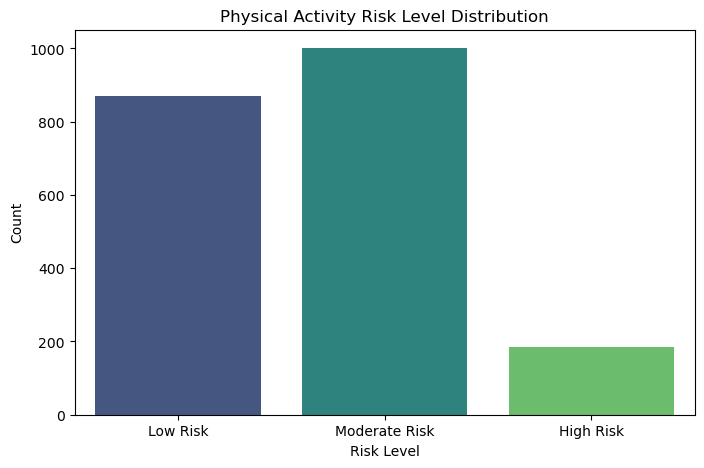

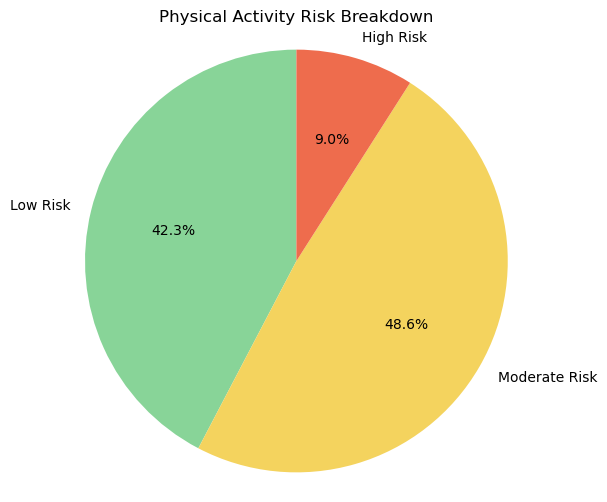

In [55]:


# Define a function to classify the risk level
def classify_risk(score):
    if score >= 70:
        return 'High Risk'
    elif score >= 40:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

# Apply classification temporarily and get value counts
risk_levels = physicalActivity_augmented_df['PhysicalActivityRisk'].apply(classify_risk)
risk_counts = risk_levels.value_counts().reindex(['Low Risk', 'Moderate Risk', 'High Risk'], fill_value=0)

# Print the counts
print("Physical Activity Risk Level Counts:")
print(risk_counts)

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=risk_counts.index, y=risk_counts.values, palette='viridis')
plt.title('Physical Activity Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#88d498', '#f4d35e', '#ee6c4d'])
plt.title('Physical Activity Risk Breakdown')
plt.axis('equal')
plt.show()


In [56]:
physicalActivity_augmented_df.to_csv("../../data/preproccedData/Augmented_PreProccedPhysicalActivityParameters.csv", index=False)